# Introduction

* Age : Age of the patient

* Sex : Sex of the patient(0: Female; 1: Male)

* exang: exercise induced angina (1 = yes; 0 = no)

* ca: number of major vessels (0-3)

* cp : Chest Pain type chest pain type
    * Value 1: typical angina
    * Value 2: atypical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic
* trtbps : resting blood pressure (in mm Hg)

* chol : cholestoral in mg/dl fetched via BMI sensor

* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

* oldpeak: ST depression induction 

* slp: the slope of the peak exercise ST segment
    * 0 = upsloping
    * 1 = flat
    * 2 = downsloping

* rest_ecg : resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

* thalach : maximum heart rate achieved

* target : 0 = less chance of heart attack; 1 = more chance of heart attack

* thall : thalassemia
    * 0 = null
    * 1 = fixed defect
    * 2 = normal
    * 3 = reversible defect

# Library

In [47]:
# Library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy
import sys
import seaborn as sns

# sklearn
import sklearn

# Clustering Model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# K - Mean Clustering 
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
# DBSCAN Clustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Classification Model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Associate Rule Mining 
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Data Initialization

**Check versions of libraries**

In [48]:
# Python version
print('Python: {}'.format(sys.version))

# scipy
print('scipy: {}'.format(scipy.__version__))

# numpy
print('numpy: {}'.format(np.__version__))

# matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

# pandas
print('pandas: {}'.format(pd.__version__))

# scikit-learn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.11.7 | packaged by conda-forge | (main, Dec 15 2023, 08:41:36) [Clang 16.0.6 ]
scipy: 1.14.1
numpy: 1.26.4
matplotlib: 3.9.2
pandas: 2.0.0
sklearn: 1.2.2


**Data Insertion** 

In [49]:
haap = pd.read_csv('heart.csv')
print('Data Shape of haap:', 'Number of rows are', haap.shape[0], 'and number of columns are', haap.shape[1])
haap.head(10)

Data Shape of haap: Number of rows are 303 and number of columns are 14


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [50]:
haap.tail(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


**Description on haap value**

In [51]:
haap.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Check Missing Value**

Through checking, there are **no missing value** inside the heart data set. Thus, it will not handling the missing value with filling value. 

In [52]:
print('Missing Value in dataset:')
print(haap.isna().sum())

Missing Value in dataset:
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


**Check unique value**

In [53]:
print('Unique Value in dataset:')
haap.nunique()

Unique Value in dataset:


age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

**Check data type**

In [54]:
print('Datatype in dataset:')
haap.dtypes

Datatype in dataset:


age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

# Exploratory Data Analysis

**Target Distribution on heart dataset**

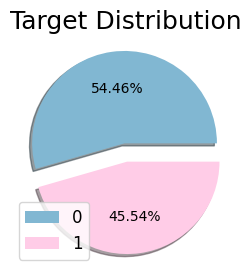

In [55]:
# plot pie chart
plt.pie(haap.output.value_counts(), shadow=True, explode=[.1,.1], autopct='%.2f%%', colors=['#81b7d2', '#ffcce7'])

# set the title and legend of pie chart
plt.title('Target Distribution', size=18)
plt.legend(['0', '1'], loc='best', fontsize=12)
plt.show()

**Numerical features**

Age Distribution

/Users/wannatalie/miniconda3/lib/python3.11/site-packages/pandas/core/algorithms.py:525: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


Text(0.5, 1.0, 'Age distribution')

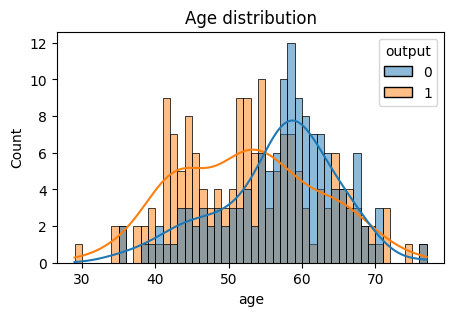

In [56]:
sns.histplot(data=haap, x='age', hue='output', binwidth=1, kde=True)
plt.title('Age distribution')

Blood Pressure Distribution

/Users/wannatalie/miniconda3/lib/python3.11/site-packages/pandas/core/algorithms.py:525: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


Text(0.5, 1.0, 'Resting blood pressure (in mm Hg)')

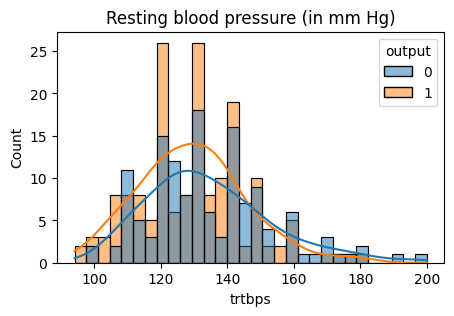

In [57]:
sns.histplot(data=haap, x='trtbps', bins=30, kde=True, hue='output')
plt.title('Resting blood pressure (in mm Hg)')

Cholestoral Distribution

/Users/wannatalie/miniconda3/lib/python3.11/site-packages/pandas/core/algorithms.py:525: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


Text(0.5, 1.0, 'Cholestoral Distribution')

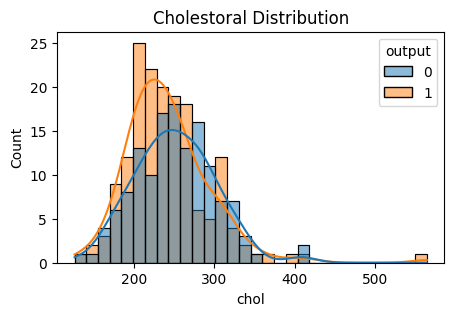

In [58]:
sns.histplot(data=haap, x='chol', bins=30, kde=True, hue='output')
plt.title('Cholestoral Distribution')

/Users/wannatalie/miniconda3/lib/python3.11/site-packages/pandas/core/algorithms.py:525: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


Text(0.5, 1.0, 'Maximum heart rate distribution')

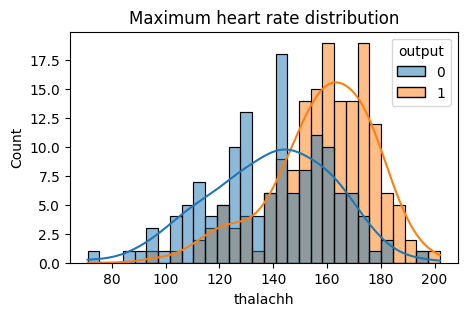

In [59]:
sns.histplot(data=haap, x='thalachh', bins=30, kde=True, hue='output')
plt.title('Maximum heart rate distribution')

/Users/wannatalie/miniconda3/lib/python3.11/site-packages/pandas/core/algorithms.py:525: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


Text(0.5, 1.0, 'ST Depression')

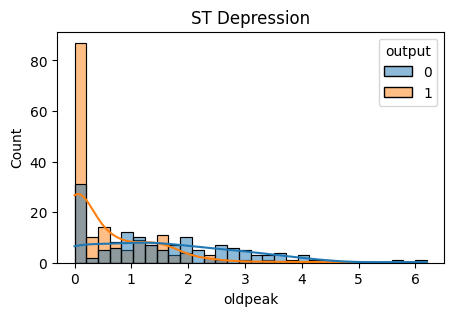

In [60]:
sns.histplot(data=haap, x='oldpeak', bins=30, kde=True, hue='output')
plt.title('ST Depression')

/Users/wannatalie/miniconda3/lib/python3.11/site-packages/pandas/core/algorithms.py:525: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/Users/wannatalie/miniconda3/lib/python3.11/site-packages/pandas/core/algorithms.py:525: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/Users/wannatalie/miniconda3/lib/python3.11/site-packages/pandas/core/algorithms.py:525: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.

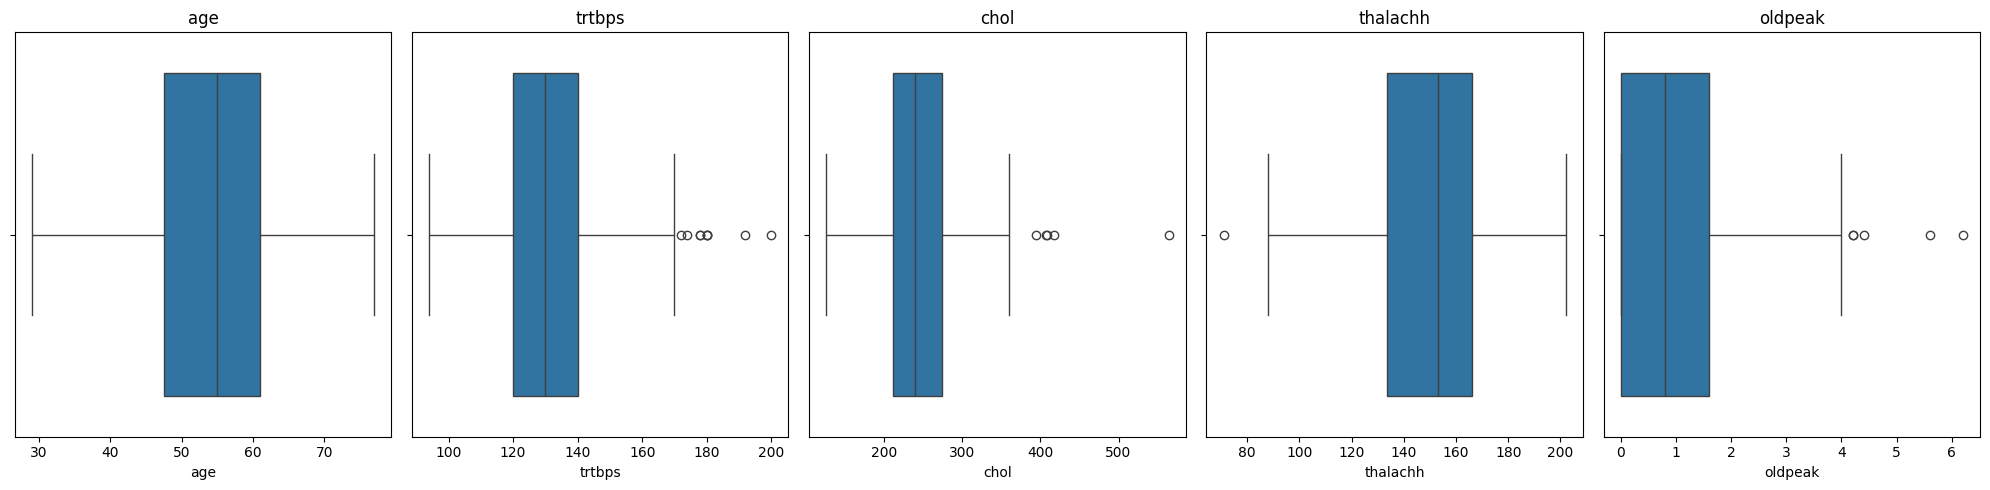

In [61]:
# Find the outlier from the numerical value
columns = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(20, 5))

for i, column in enumerate(columns):
    sns.boxplot(data=haap, x=column, ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

**Categorical Feature**

Sex Distribution

/Users/wannatalie/miniconda3/lib/python3.11/site-packages/pandas/core/algorithms.py:525: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/Users/wannatalie/miniconda3/lib/python3.11/site-packages/pandas/core/algorithms.py:525: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/Users/wannatalie/miniconda3/lib/python3.11/site-packages/pandas/core/algorithms.py:525: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.

Text(0.5, 1.0, 'Sex Distribution')

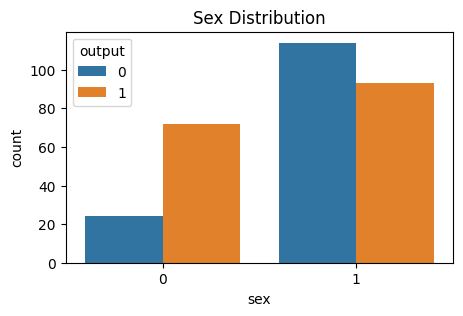

In [62]:
sns.countplot(data=haap, x='sex', hue = 'output')
plt.title("Sex Distribution")

/Users/wannatalie/miniconda3/lib/python3.11/site-packages/pandas/core/algorithms.py:525: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/Users/wannatalie/miniconda3/lib/python3.11/site-packages/pandas/core/algorithms.py:525: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/Users/wannatalie/miniconda3/lib/python3.11/site-packages/pandas/core/algorithms.py:525: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.

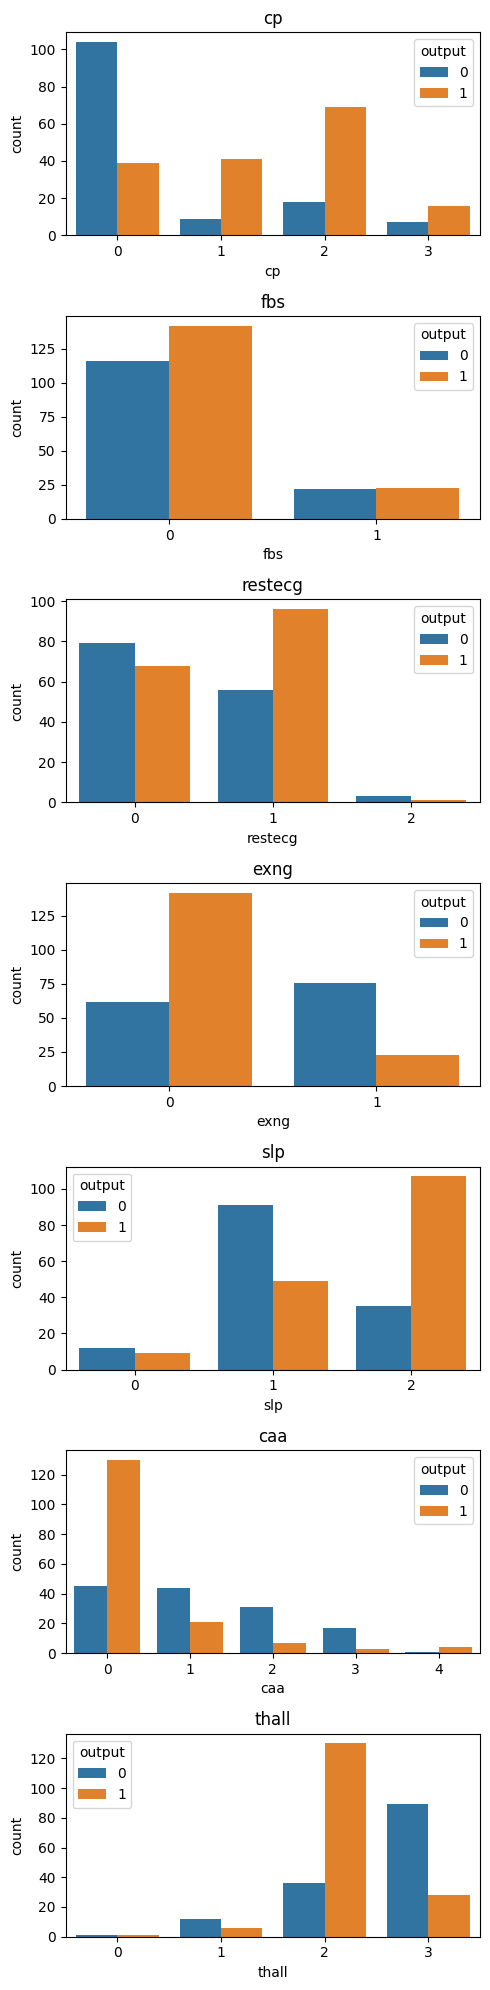

In [63]:
categoric_vars_list = [ "cp", "fbs", "restecg", "exng", "slp", "caa", 'thall']

# Plot categorical features
fig=plt.figure(figsize=(5,20))
for i, var_name in enumerate(categoric_vars_list):
    ax=fig.add_subplot(7,1,i+1)
    sns.countplot(data=haap, x=var_name, axes=ax, hue='output')
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

# Outlier Detection

In [64]:
haap_copy = haap.copy()

In [65]:
#outliers detecting function
def detect_outlier(haap_copy):
    outliers=[]
    m = np.mean(haap_copy)
    s = np.std(haap_copy)
    for y in haap_copy:
        z_score= (y - m)/s
        if np.abs(z_score) > 3:
            outliers.append(y)
    return outliers

In [66]:
#outliers detecting
print(detect_outlier(haap_copy.age))
print(detect_outlier(haap_copy.trtbps))
print(detect_outlier(haap_copy.chol))
print(detect_outlier(haap_copy.thalachh))
print(detect_outlier(haap_copy.oldpeak))

[]
[200, 192]
[417, 564, 407, 409]
[71]
[6.2, 5.6]


In [67]:
# drop the outlier from the dataset
for column in columns:
    # quarter one
    q1 = haap[column].quantile(0.25)
    
    # quarter three
    q3 = haap[column].quantile(0.75)
    
    iqr = q3 - q1
    threshold = 1.5 * iqr

    outliers = haap_copy[(haap_copy[column] < q1 - threshold) | (haap_copy[column] > q3 + threshold)]

    haap_copy = haap_copy.drop(outliers.index)

**Check whether outlier detection is finished**

/Users/wannatalie/miniconda3/lib/python3.11/site-packages/pandas/core/algorithms.py:525: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/Users/wannatalie/miniconda3/lib/python3.11/site-packages/pandas/core/algorithms.py:525: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/Users/wannatalie/miniconda3/lib/python3.11/site-packages/pandas/core/algorithms.py:525: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.

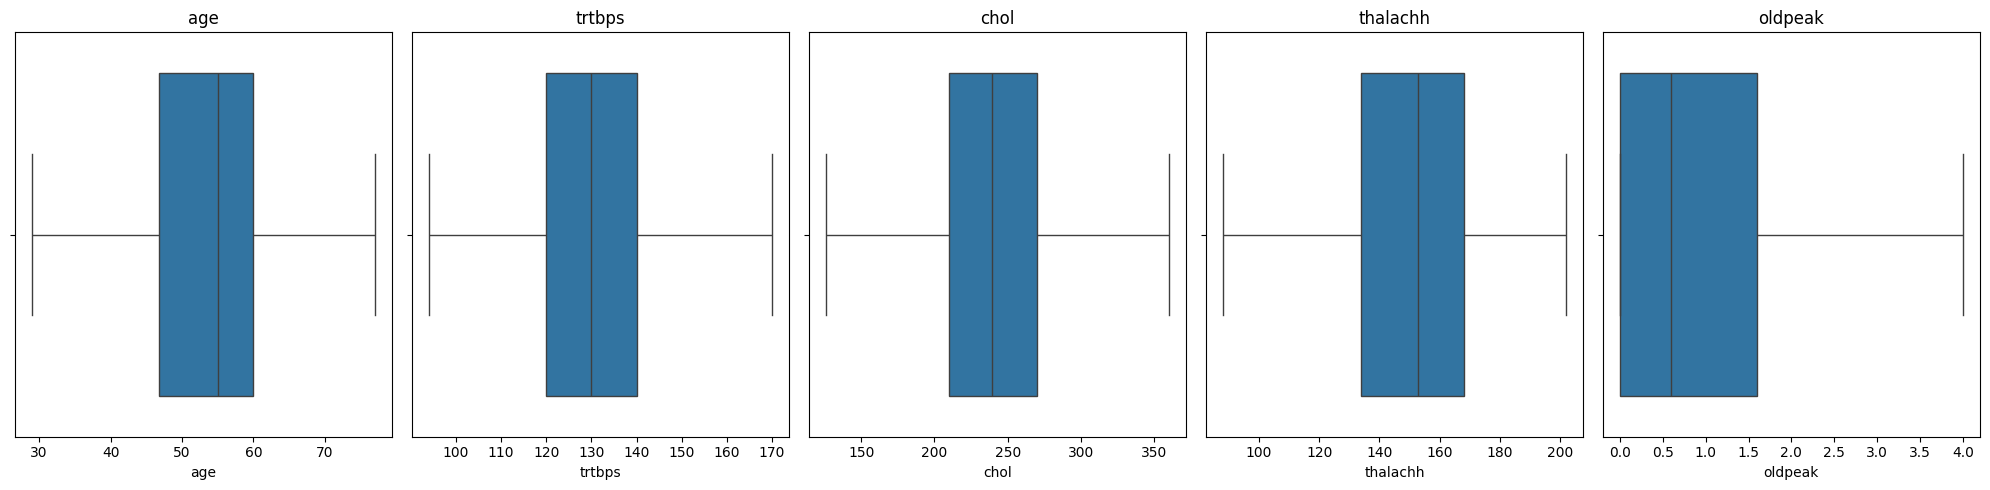

In [68]:
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(20, 5))

for i, column in enumerate(columns):
    sns.boxplot(data=haap_copy, x=column, ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

In [69]:
# Check the value of datasets
haap_copy.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1


In [70]:
print('Number of rows are', haap_copy.shape[0], 'and number of columns are', haap_copy.shape[1])

Number of rows are 284 and number of columns are 14


In [71]:
haap_copy1 = haap_copy.copy()

# Associate Rule Mining

In [72]:
# save a copy for associate rule mining
haap_copy3 = haap_copy1.copy()
haap_copy3

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [73]:
def binning_equi_depth(haap_copy3, column, num_bins):
    groups = pd.qcut(haap_copy3[column], q=num_bins, labels=False, duplicates='drop')
    
    col_min = round(haap_copy3[column].min(), 2)
    col_max = round(haap_copy3[column].max(), 2)
    bin_size = round((col_max - col_min) / num_bins, 2)
    
    bins = [col_min + i * bin_size for i in range(num_bins+1)]
    bins[0] = float('-inf')  
    bins[-1] = float('inf')  
    
    groups = pd.cut(haap_copy3[column], bins=bins, labels=False)
    
    intervals = [f"{col_min + i * bin_size:.2f}-{col_min + (i + 1) * bin_size:.2f}" for i in range(num_bins)]
    groups = groups.replace(range(num_bins), intervals)
    haap_copy3[column] = groups
    return haap_copy3

num_bins = 3
columns = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

for column in columns:
    haap_copy3 = binning_equi_depth(haap_copy3, column, num_bins)

haap_copy3 = pd.DataFrame(haap_copy3)
haap_copy3.head(10)

/Users/wannatalie/miniconda3/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/wannatalie/miniconda3/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/wannatalie/miniconda3/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (D

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,61.00-77.00,1,3,144.66-169.99,204.00-282.00,1,0,126.00-164.00,0,1.33-2.66,0,0,1,1
1,29.00-45.00,1,2,119.33-144.66,204.00-282.00,0,1,164.00-202.00,0,2.66-3.99,0,0,2,1
2,29.00-45.00,0,1,119.33-144.66,126.00-204.00,0,0,164.00-202.00,0,1.33-2.66,2,0,2,1
3,45.00-61.00,1,1,119.33-144.66,204.00-282.00,0,1,164.00-202.00,0,0.00-1.33,2,0,2,1
4,45.00-61.00,0,0,119.33-144.66,282.00-360.00,0,1,126.00-164.00,1,0.00-1.33,2,0,2,1
5,45.00-61.00,1,0,119.33-144.66,126.00-204.00,0,1,126.00-164.00,0,0.00-1.33,1,0,1,1
6,45.00-61.00,0,1,119.33-144.66,282.00-360.00,0,0,126.00-164.00,0,0.00-1.33,1,0,2,1
7,29.00-45.00,1,1,119.33-144.66,204.00-282.00,0,1,164.00-202.00,0,0.00-1.33,2,0,3,1
9,45.00-61.00,1,2,144.66-169.99,126.00-204.00,0,1,164.00-202.00,0,1.33-2.66,2,0,2,1
10,45.00-61.00,1,0,119.33-144.66,204.00-282.00,0,1,126.00-164.00,0,0.00-1.33,2,0,2,1


In [74]:
haap_copy3['sex'] = haap_copy3['sex'].replace({1: 'Male', 0: 'Female'})
haap_copy3['cp'] = haap_copy3['cp'].replace({0: 'asymptomatic', 1: 'typical angina', 2: 'atypical angina', 3: 'non-anginal pain'})
haap_copy3['fbs'] = haap_copy3['fbs'].replace({1: 'fasting blood sugar > 120 mg/dl', 0: 'fasting blood sugar <= 120 mg/dl'})
haap_copy3['restecg'] = haap_copy3['restecg'].replace({0: 'normal', 1: 'having ST-T wave abnormality', 2: 'left ventricular hypertrophy'})
haap_copy3['exng'] = haap_copy3['exng'].replace({1: 'exercise induced angina', 0: 'exercise not induced angina'})
haap_copy3['slp'] = haap_copy3['slp'].replace({0: 'no slope', 1: 'flat', 2: 'sloper'})
haap_copy3['caa'] = haap_copy3['caa'].replace({0: '0 major vessels', 1: '1 major vessels', 2: '2 major vessels', 3: '3 major vessels'})
haap_copy3['thall'] = haap_copy3['thall'].replace({1: 'fixed defect', 2: 'normal', 3: 'Extreme defect'})
haap_copy3['output'] = haap_copy3['output'].replace({0: 'less chance of heart attack', 1: 'more chance of heart attack'})

# View the detail of data 
haap_copy3.tail(10)

/Users/wannatalie/miniconda3/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/wannatalie/miniconda3/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/wannatalie/miniconda3/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (D

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
293,61.00-77.00,Male,atypical angina,144.66-169.99,204.00-282.00,fasting blood sugar <= 120 mg/dl,normal,126.00-164.00,exercise not induced angina,0.00-1.33,flat,0 major vessels,Extreme defect,less chance of heart attack
294,29.00-45.00,Male,asymptomatic,119.33-144.66,126.00-204.00,fasting blood sugar <= 120 mg/dl,having ST-T wave abnormality,126.00-164.00,exercise induced angina,2.66-3.99,no slope,0 major vessels,fixed defect,less chance of heart attack
295,61.00-77.00,Male,asymptomatic,119.33-144.66,126.00-204.00,fasting blood sugar <= 120 mg/dl,normal,126.00-164.00,exercise induced angina,2.66-3.99,sloper,2 major vessels,Extreme defect,less chance of heart attack
296,61.00-77.00,Female,asymptomatic,119.33-144.66,126.00-204.00,fasting blood sugar <= 120 mg/dl,having ST-T wave abnormality,126.00-164.00,exercise induced angina,0.00-1.33,flat,0 major vessels,normal,less chance of heart attack
297,45.00-61.00,Male,asymptomatic,144.66-169.99,126.00-204.00,fasting blood sugar > 120 mg/dl,normal,88.00-126.00,exercise not induced angina,0.00-1.33,flat,2 major vessels,fixed defect,less chance of heart attack
298,45.00-61.00,Female,asymptomatic,119.33-144.66,204.00-282.00,fasting blood sugar <= 120 mg/dl,having ST-T wave abnormality,88.00-126.00,exercise induced angina,0.00-1.33,flat,0 major vessels,Extreme defect,less chance of heart attack
299,29.00-45.00,Male,non-anginal pain,94.00-119.33,204.00-282.00,fasting blood sugar <= 120 mg/dl,having ST-T wave abnormality,126.00-164.00,exercise not induced angina,0.00-1.33,flat,0 major vessels,Extreme defect,less chance of heart attack
300,61.00-77.00,Male,asymptomatic,119.33-144.66,126.00-204.00,fasting blood sugar > 120 mg/dl,having ST-T wave abnormality,126.00-164.00,exercise not induced angina,2.66-3.99,flat,2 major vessels,Extreme defect,less chance of heart attack
301,45.00-61.00,Male,asymptomatic,119.33-144.66,126.00-204.00,fasting blood sugar <= 120 mg/dl,having ST-T wave abnormality,88.00-126.00,exercise induced angina,0.00-1.33,flat,1 major vessels,Extreme defect,less chance of heart attack
302,45.00-61.00,Female,typical angina,119.33-144.66,204.00-282.00,fasting blood sugar <= 120 mg/dl,normal,164.00-202.00,exercise not induced angina,0.00-1.33,flat,1 major vessels,normal,less chance of heart attack


To find the strong association rule, set the formula as:

* Minimum Support is 35%
* Minimum Confidence is 80%

In [75]:
haap_copy3 = haap_copy3.astype(str)
haap_copy3 = haap_copy3.values.tolist()

# Create TransactionEncoder object
object = TransactionEncoder()

# Perform One-hot encoding
te_ary = object.fit_transform(haap_copy3)
haap_copy3 = pd.DataFrame(te_ary, columns= object.columns_)

# find the frequent itemset with associate rule mining
frequent_itemsets = apriori(haap_copy3, min_support=0.35,use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.80)

# Filter rules to include desired consequents
desired_attributes = ['more chance of heart attack', 'less chance of heart attack']
filtered_rules = rules[rules['consequents'].astype(str).str.contains("|".join(desired_attributes))]

arm = []
for index, row in filtered_rules.iterrows():
    antecedents = ', '.join(row['antecedents'])
    consequents = ', '.join(row['consequents'])
    support = row['support']
    confidence = row['confidence']
    armRule = f"{antecedents} --> {consequents} [Support: {support:.3f}, Confidence: {confidence:.3f}]"
    arm.append(armRule)
    print(armRule)

0.00-1.33, 0 major vessels --> more chance of heart attack [Support: 0.359, Confidence: 0.823]
exercise not induced angina, 0 major vessels --> more chance of heart attack [Support: 0.380, Confidence: 0.857]
normal, 0 major vessels --> more chance of heart attack [Support: 0.391, Confidence: 0.816]
normal, fasting blood sugar <= 120 mg/dl, 0 major vessels --> more chance of heart attack [Support: 0.352, Confidence: 0.820]


/Users/wannatalie/miniconda3/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


# Data Preprocessing

In [76]:
# Creating new dataframe
haap_copy2 = haap_copy1.copy()
haap_copy2['output'] = haap_copy2['output'].replace({0: False, 1: True})
haap_x1 = haap_copy2.drop('output',axis=1)
haap_y1 = haap_copy2['output']
haap_x1.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2


# Modelling 

**Clustering - Based Model**

**K - Mean Clustering**

In [77]:
# Standardize the dataset and apply K-means clustering
SS = StandardScaler(with_mean=False, with_std=True)
KC = SS.fit_transform(haap_x1)

/Users/wannatalie/miniconda3/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/wannatalie/miniconda3/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/wannatalie/miniconda3/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (D

In [78]:
km = KMeans(n_clusters=2, n_init='auto')
km.fit(KC)
cop = [km.cluster_centers_[0][0],km.cluster_centers_[1][0]]
cth = [km.cluster_centers_[0][5],km.cluster_centers_[1][5]]

/Users/wannatalie/miniconda3/lib/python3.11/site-packages/pandas/core/algorithms.py:525: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/Users/wannatalie/miniconda3/lib/python3.11/site-packages/pandas/core/algorithms.py:525: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


<Axes: title={'center': 'Predicted output'}, xlabel='Previous peak', ylabel='sex'>

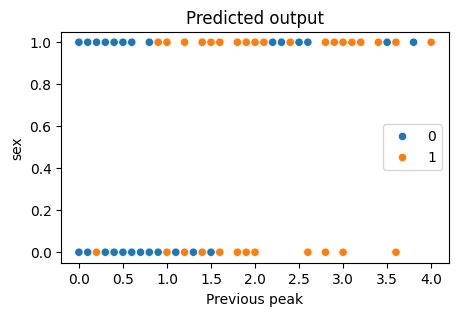

In [79]:
plt.title("Predicted output")
plt.xlabel("Previous peak")
plt.ylabel("sex")
sns.scatterplot(x="oldpeak", y="sex", data=haap_x1, hue = km.labels_)

/Users/wannatalie/miniconda3/lib/python3.11/site-packages/pandas/core/algorithms.py:525: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/Users/wannatalie/miniconda3/lib/python3.11/site-packages/pandas/core/algorithms.py:525: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


<Axes: title={'center': 'Actual output'}, xlabel='Previous peak', ylabel='sex'>

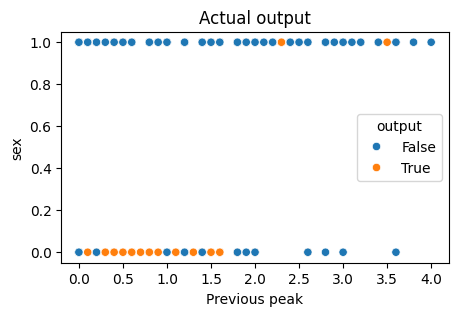

In [80]:
plt.title("Actual output")
plt.xlabel("Previous peak")
plt.ylabel("sex")
sns.scatterplot(x="oldpeak", y="sex",data=haap_x1, hue = haap_y1)

In [81]:
ac= accuracy_score(haap_y1, km.labels_)
print("Accuracy of KMeans clustering is {:.3f} %".format(ac*100))

Accuracy of KMeans clustering is 19.014 %


**DBSCAN**

In [82]:
# Compute data proximity
neighbors = NearestNeighbors(n_neighbors=2) 
nbrs = neighbors.fit(haap_copy2)
distances,indices = nbrs.kneighbors(haap_copy2) # finding nearest neighbours

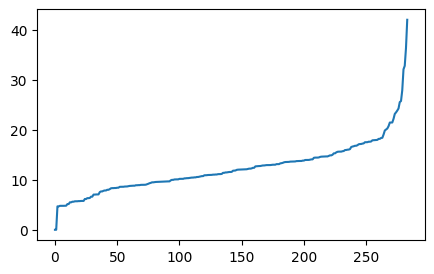

In [83]:
# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # Sort
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3)
plt.plot(distances)
plt.show() # showing the plot

The curve indicate the maximum  value is 25 and Eps is picked as 25. 

While the minimum point to form the cluster is 4. 

Parameters as: MinPoints = 4 Eps = 25

In [84]:
# cluster the data into five clusters
dbscan = DBSCAN(eps = 25, min_samples = 4).fit(haap_copy) # fitting the model
labels = dbscan.labels_ # getting the labels

/Users/wannatalie/miniconda3/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


In [85]:
def accr(actual,predicted):
    count = 0
    for i in range(0,len(actual)):
        if(actual[i]==predicted[i]):
            count = count + 1
    acc = count/len(actual)
    return(1 - acc)
print('Accuracy is', accr(list(haap_copy1["output"]),list(dbscan.labels_)))

Accuracy is 0.5774647887323944


**Classification - Based Model**

In [ ]:
# Make a copy for classification - based model
haap_copy4 = haap_copy.copy()
haap_M = haap_copy4[haap_copy4['sex'] == 1].reset_index(drop=True)
haap_F = haap_copy4[haap_copy4['sex'] == 0].reset_index(drop=True)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
3,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
4,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
195,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
196,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
197,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0


In [87]:
# Define dictionary with model accuracies
model_dict = {}

In [88]:
def modelAnalysis(x,y):
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=48)

  classifier = [KNeighborsClassifier(), DecisionTreeClassifier(random_state=101), RandomForestClassifier(random_state=101)]
  title = ['Kneighbors Classifier', 'Decision Tree Classifier', 'Random Forest Classifier']

  for i in classifier:
    print("\033[1m" + title[classifier.index(i)] + "\033[0;0m")
    predictor = i.fit(X_train, y_train)
    y_pred = predictor.predict(X_test)
    accuracy_knn = accuracy_score(y_test, y_pred)
    model_dict[title[classifier.index(i)]] = accuracy_knn
    print("Accuracy is", accuracy_knn)
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    cm_display.plot()
    plt.show()


/Users/wannatalie/miniconda3/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/wannatalie/miniconda3/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


Kneighbors Classifier
Accuracy is 0.7325581395348837


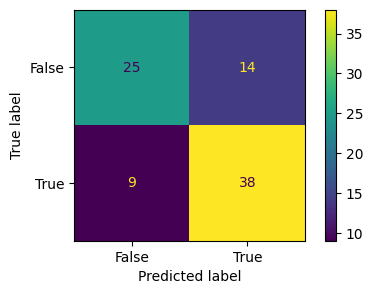

/Users/wannatalie/miniconda3/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/wannatalie/miniconda3/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


Decision Tree Classifier
Accuracy is 0.7790697674418605


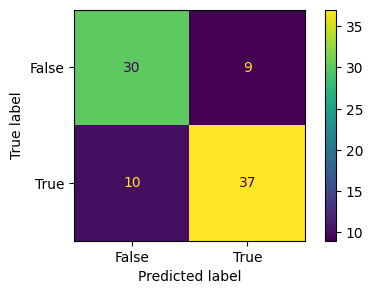

Random Forest Classifier


/Users/wannatalie/miniconda3/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


Accuracy is 0.8488372093023255


/Users/wannatalie/miniconda3/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


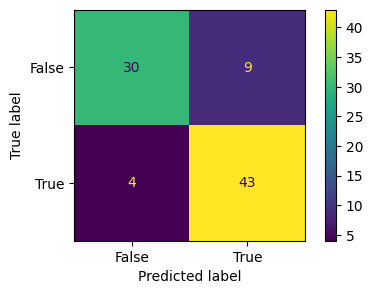

In [89]:
# model analysis of original dataset 
x = haap_copy4.drop('output', axis=1)
y = haap_copy4['output']
modelAnalysis(x, y)

/Users/wannatalie/miniconda3/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/wannatalie/miniconda3/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


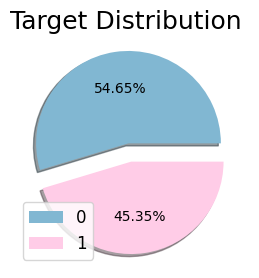

In [90]:
# Generate the output of target value
classifier = RandomForestClassifier(random_state=101)
haap_copy5 = haap_copy4.copy()
x1 = haap_copy5.drop('output', axis=1)
y1 = haap_copy5['output']

X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=48)
predictor = classifier.fit(X_train, y_train)
y_pred = predictor.predict(X_test)
classifier = predictor

submission_df = pd.DataFrame(data=y_test).reset_index()
submission_df.drop(columns=['index'], inplace=True, axis=1)
submission_df.head()

plt.pie(submission_df.output.value_counts(), shadow=True, explode=[.1,.1], autopct='%.2f%%', colors=['#81b7d2', '#ffcce7'])
plt.title('Target Distribution ', size=18)
plt.legend(['0', '1'], loc='best', fontsize=12)
plt.show()


# Question on analysis

**Male**

/Users/wannatalie/miniconda3/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/wannatalie/miniconda3/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


Kneighbors Classifier
Accuracy is 0.7333333333333333


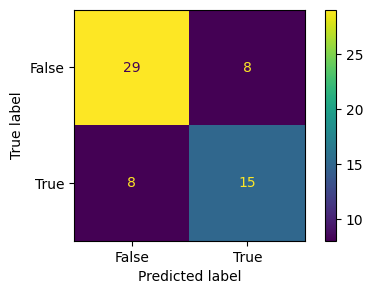

/Users/wannatalie/miniconda3/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/wannatalie/miniconda3/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


Decision Tree Classifier
Accuracy is 0.65


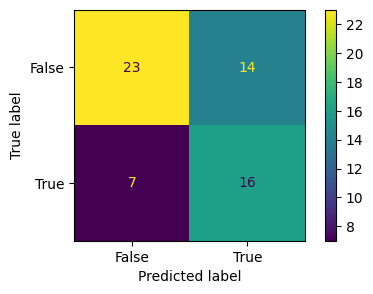

/Users/wannatalie/miniconda3/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


Random Forest Classifier
Accuracy is 0.7666666666666667


/Users/wannatalie/miniconda3/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


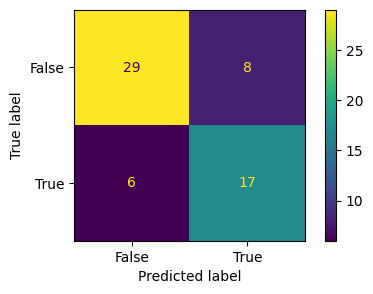

In [91]:
# model analysis of Male 
x = haap_M.drop('output', axis=1)
y = haap_M['output']
modelAnalysis(x, y)

**Female**

Kneighbors Classifier
Accuracy is 0.5769230769230769


/Users/wannatalie/miniconda3/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/wannatalie/miniconda3/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


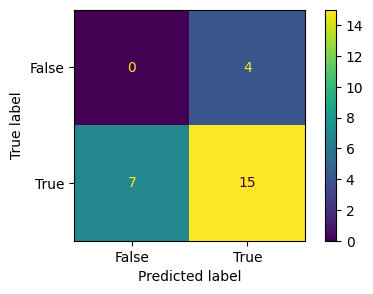

Decision Tree Classifier
Accuracy is 0.9615384615384616


/Users/wannatalie/miniconda3/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/wannatalie/miniconda3/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


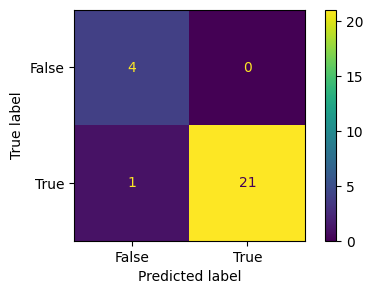

/Users/wannatalie/miniconda3/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


Random Forest Classifier
Accuracy is 0.9230769230769231


/Users/wannatalie/miniconda3/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


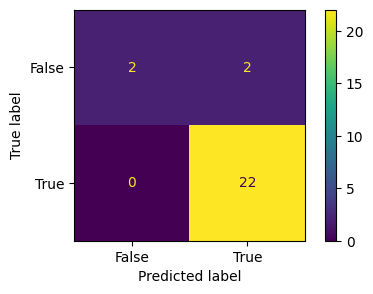

In [92]:
# model analysis of Female 
x = haap_F.drop('output', axis=1)
y = haap_F['output']
modelAnalysis(x, y)